# <span id="toc">  Esercizio 3 - Option Pricing </span>

- [Esercizio 3.1](#ex03_1)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In questo esercizio mi occupo del problema dell'**Option Pricing**, in particolare voglio verificare numericamente la soluzione analitica fornita dalla teoria di Black-Scholes per il corretto prezzamento delle opzioni europee di tipo Call e Put. 

Questa teoria assume che l'evoluzione nel tempo del prezzo di un asset sia stocastica e che mostri un comportamento analogo a quello di un Moto Browniano Geometrico (GBM) con tasso di interesse risk-free costante $r$ e volatilità $\sigma$.

## <span id="ex03_1">  Esercizio 3.1 </span>[^](#toc)

L'obiettivo è stimare i prezzi delle opzioni Call e Put, dopo aver simulato il prezzo finale di $S(t)$ e poi tornando al tempo iniziale, con due modlità differenti:  
- Campionando direttamente il valore $S(T)$ in analogia ad un moto $GBM(r,\sigma)$, con valore iniziale $S(0)$
- Campionando il moto $GBM(r,\sigma)$ discretizzando il moto browniano, dividendo $[0,T]$ in sottointervalli temporali

in modo tale da poter calcolare:
$$
C[S(0),0] = e^{-rT} max(0,S(T)-K)\\                  
P(S(0),0) = e^{-rT} max(0,K-S(T))
$$

Per entrambe le simulazioni uso i seguenti parametri:
- Prezzo dell'asset a $t=0$: $S(0)=100$
- Scadenza: $T=1$
- Prezzo di esercizio: $K=100$
- Tasso di interesse risk-free: $r=0.1$
- Volatilità: $\sigma=0.25$

effettuando $M = 10^4$ estrazioni totali, suddivise in $N = 100$ blocchi.

### Campionamento diretto

In questo caso ho campionato direttamente il prezzo finale secondo il moto browniano geometrico

$$
S(T) = S(0) \exp\left[\left(r-\frac{1}{2}\sigma^2\right)t+\sigma Z \sqrt{T}\right]
$$
con $Z \sim \mathcal{N}(0,1)$.

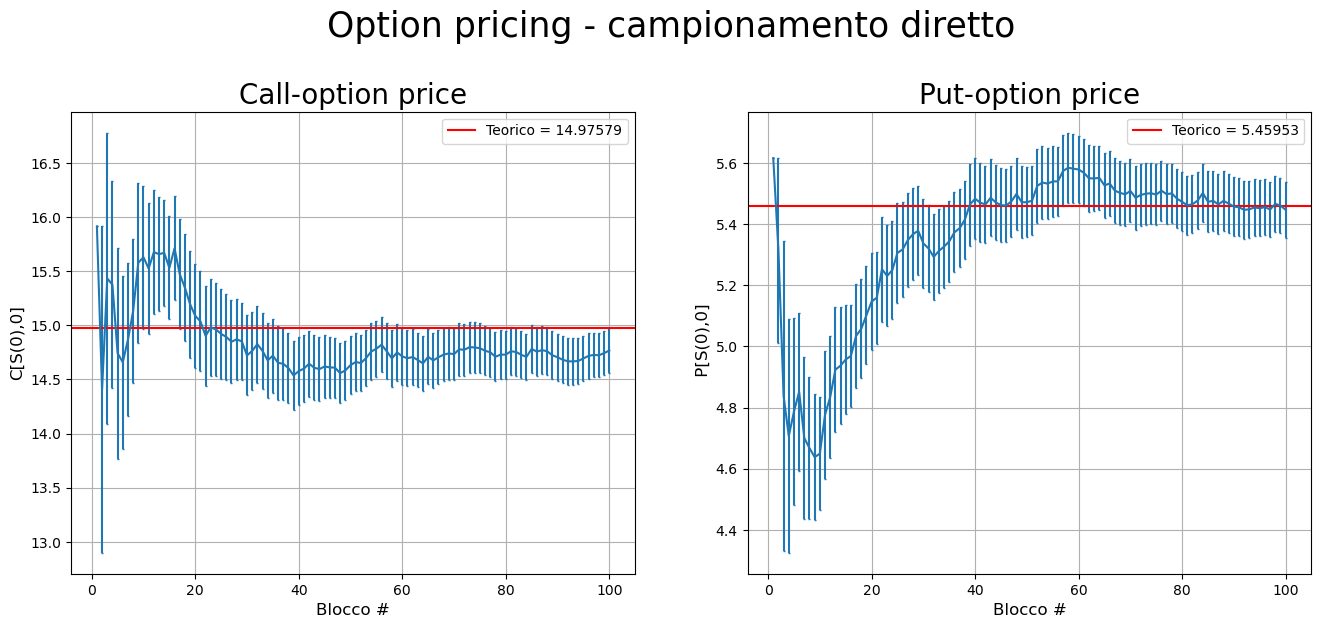

Valore medio finale del Call-option price =  14.7669
Incertezza =  0.203308

Valore medio finale del Put-option price =  5.44741
Incertezza =  0.0908553


In [2]:
plt.figure(figsize=(16,6))
plt.suptitle('Option pricing - campionamento diretto', fontsize=25, y=1.05)

# Campionamento diretto
# Call-option price
plt.subplot(1,2,1)
block, call_ave1, call_err1 = np.loadtxt('OUTPUT/direct.dat', skiprows=1, usecols=(0,2,3), unpack=True)
plt.errorbar(block, call_ave1, yerr=call_err1, capsize=1)
plt.axhline(y=14.97579, color='r', linestyle='-', label='Teorico = 14.97579')
plt.xlabel('Blocco #', fontsize = 12)
plt.ylabel('C[S(0),0]', fontsize=12)
plt.title('Call-option price', fontsize=20)
plt.legend()
plt.grid(True)

# Put-option price
plt.subplot(1,2,2)
block, put_ave1, put_err1 = np.loadtxt('OUTPUT/direct.dat', skiprows=1, usecols=(0,5,6), unpack=True)
plt.errorbar(block, put_ave1, yerr=put_err1, capsize=1)
plt.axhline(y=5.45953, color='r', linestyle='-', label='Teorico = 5.45953')
plt.xlabel('Blocco #', fontsize=12)
plt.ylabel(' P[S(0),0]', fontsize=12)
plt.title('Put-option price', fontsize=20)
plt.legend()
plt.grid(True)

plt.show()

print('Valore medio finale del Call-option price = ', call_ave1[-1])
print('Incertezza = ', call_err1[-1])
print()
print('Valore medio finale del Put-option price = ', put_ave1[-1])
print('Incertezza = ', put_err1[-1])

### Campionamento discretizzato

In questo caso ho discretizzato l’intervallo temporale $T$ in $t_{\text{steps}} = 100$ sottointervalli di ampiezza $dt = T/t_{\text{steps}}$.  

Partendo da $S_0$, ho fatto evolvere il prezzo ad ogni passo come:

$$
S_{t+dt} = S_t \exp\!\Big[(r-\tfrac12\sigma^2)dt + \sigma Z_{dt} \sqrt{dt}\Big]
$$
con $Z_{dt} \sim \mathcal{N}(0,1)$.

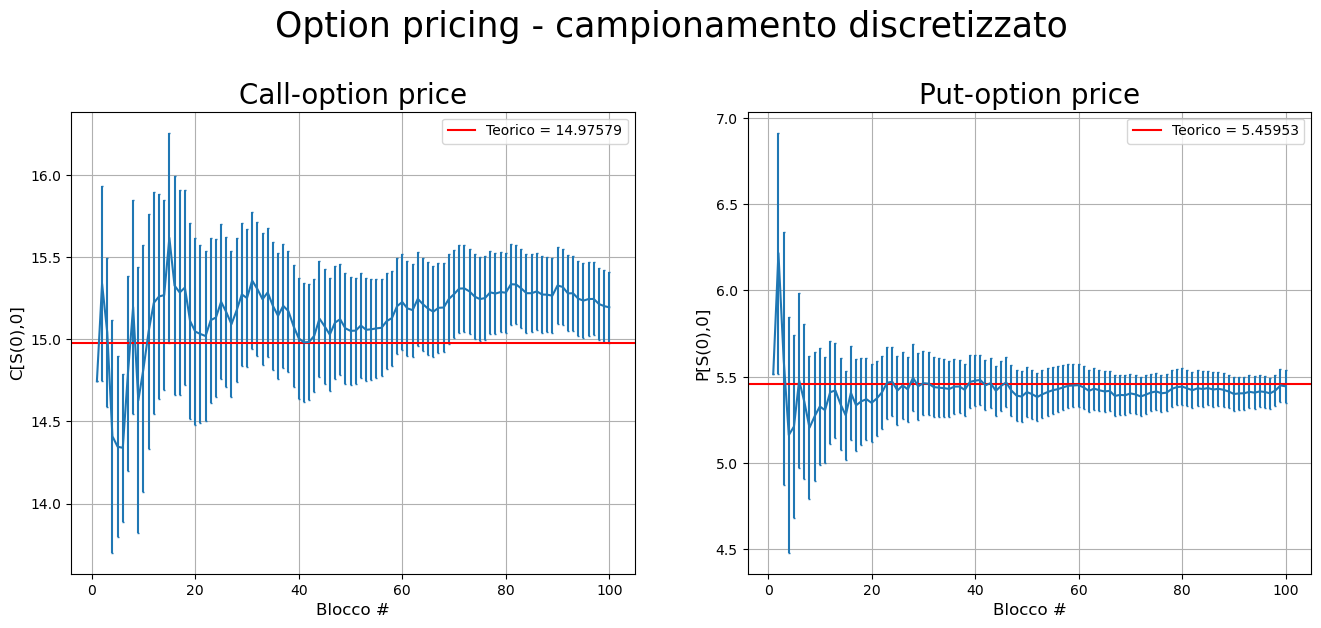

Valore medio finale del Call-option price =  15.1936
Incertezza =  0.217683

Valore medio finale del Put-option price =  5.44461
Incertezza =  0.0950282


In [3]:
plt.figure(figsize=(16,6))
plt.suptitle('Option pricing - campionamento discretizzato', fontsize=25, y=1.05)

# Campionamento discetizzato
# Call-option price
plt.subplot(1,2,1)
block, call_ave2, call_err2 = np.loadtxt('OUTPUT/discretized.dat', skiprows=1, usecols=(0,2,3), unpack=True)
plt.errorbar(block, call_ave2, yerr=call_err2, capsize=1)
plt.axhline(y=14.97579, color='r', linestyle='-', label='Teorico = 14.97579')
plt.xlabel('Blocco #', fontsize=12)
plt.ylabel('C[S(0),0]', fontsize = 12)
plt.title('Call-option price', fontsize=20)
plt.legend()
plt.grid(True)

# Put-option price
plt.subplot(1,2,2)
block, put_ave2, put_err2 = np.loadtxt('OUTPUT/discretized.dat', skiprows=1, usecols=(0,5,6), unpack=True)
plt.errorbar(block, put_ave2, yerr=put_err2, capsize=1)
plt.axhline(y=5.45953, color='r', linestyle='-', label='Teorico = 5.45953')
plt.xlabel('Blocco #', fontsize=12)
plt.ylabel('P[S(0),0]', fontsize=12)
plt.title('Put-option price', fontsize=20)
plt.legend()
plt.grid(True)

plt.show()

print('Valore medio finale del Call-option price = ', call_ave2[-1])
print('Incertezza = ', call_err2[-1])
print()
print('Valore medio finale del Put-option price = ', put_ave2[-1])
print('Incertezza = ', put_err2[-1])

Dai grafici si osserva che con entrmabi i metodi di campionamento, i risultati ottenuti sono compatibili con i valori attesi dalle formule di Black–Scholes per le opzioni Call e Put entro l'incertezza statistica.